In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("C:\\Users\\kilar\\Downloads\\emails1.txt",error_bad_lines=False)

In [3]:
data.sample(5)

,Unnamed: 0,filename,Message-ID,content,Class
44890,44890,campbell-l/all_documents/892.,<32072918.1075857848057.JavaMail.evans@thyme>,1. Only send your timesheet if you have taken ...,Non Abusive
24312,24312,beck-s/_sent_mail/552.,<12527058.1075855925281.JavaMail.evans@thyme>,I was forwarded a copy of Fernley's announceme...,Non Abusive
34107,34107,beck-s/sent_items/43.,<6381717.1075840369390.JavaMail.evans@thyme>,Kristin was there - I had to cut it short by a...,Non Abusive
1216,1216,hodge-j/deleted_items/536.,<7454849.1075861694625.JavaMail.evans@thyme>,Company: 000236 Arng: 37147-00709 Eff ...,Abusive
20205,20205,bass-e/sent/281.,<16061278.1075854691961.JavaMail.evans@thyme>,Your WRs are terrible - let me help you out,Non Abusive


In [4]:
data.shape

(48076, 5)

#  Data Cleaning

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48076 entries, 0 to 48075
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  48076 non-null  int64 
 1   filename    48076 non-null  object
 2   Message-ID  48076 non-null  object
 3   content     48076 non-null  object
 4   Class       48076 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


In [6]:
# drop first 3 cols
data1=data.drop(columns=['Unnamed: 0','filename','Message-ID'],axis=1)

In [7]:
# rename the cols
data1=data1.rename({'content':'text','Class':'target'},axis=1)

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [9]:
data1['target']=encoder.fit_transform(data1['target'])

In [10]:
data1.sample(5)

,text,target
6835,this is my idea of vacation...,1
26507,I have not been able to schedule a review with...,1
27785,You have received this email because you are l...,1
26675,"Rick,\n\nI read your memo regarding Global Ris...",1
28091,Assistant - Christina Valdez x39106,1


In [11]:
# missing values
data1.isnull().sum()

text      0
target    0
dtype: int64

In [12]:
# check for duplicate values
data1.duplicated().sum()

23420

In [13]:
#remove duplicates
data1=data1.drop_duplicates(keep='first')

In [14]:
data1.duplicated().sum()

0

In [15]:
data1.shape

(24656, 2)

#  EDA

In [16]:
data1['target'].value_counts()

1    23014
0     1642
Name: target, dtype: int64

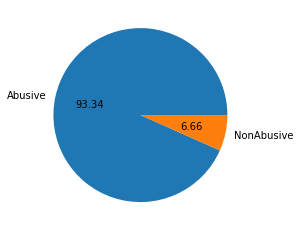

In [17]:
import matplotlib.pyplot as plt
plt.pie(data1['target'].value_counts(),labels=['Abusive','NonAbusive'],autopct="%0.2f")
plt.show()

In [18]:
#data is imbalance
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kilar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
data1['char_count']=data1['text'].apply(len)
data1.head()

,text,target,char_count
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220
1,fuck you,0,8
2,Gentlemen:\nThe following champagne is availab...,0,612
3,sorry i've taken so long...just been trying to...,0,505
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203


In [20]:
#num of words
data1['num_words']=data1['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [21]:
data1.head()

,text,target,char_count,num_words
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220,44
1,fuck you,0,8,2
2,Gentlemen:\nThe following champagne is availab...,0,612,99
3,sorry i've taken so long...just been trying to...,0,505,163
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203,42


In [22]:
data1['num_sentences']=data1['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [23]:
data1.head()

,text,target,char_count,num_words,num_sentences
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220,44,1
1,fuck you,0,8,2,1
2,Gentlemen:\nThe following champagne is availab...,0,612,99,6
3,sorry i've taken so long...just been trying to...,0,505,163,8
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203,42,2


In [24]:
data1[['char_count','num_words','num_sentences']].describe()

,char_count,num_words,num_sentences
count,24656.000000,24656.000000,24656.000000
mean,1798.708306,340.356789,12.570409
std,5394.644531,818.237457,26.921471
min,1.000000,1.000000,1.000000
25%,264.000000,51.000000,3.000000
50%,729.000000,142.000000,6.000000
75%,1748.000000,344.000000,13.000000
max,272036.000000,32296.000000,1088.000000


In [25]:
#Abusive Words
data1[data1['target']==0][['char_count','num_words','num_sentences']].describe()

,char_count,num_words,num_sentences
count,1642.000000,1642.000000,1642.000000
mean,1690.338002,342.700365,16.955542
std,2834.633786,590.602208,32.171859
min,5.000000,1.000000,1.000000
25%,183.000000,40.250000,3.000000
50%,597.500000,123.000000,6.000000
75%,2121.000000,434.750000,19.000000
max,35528.000000,7112.000000,339.000000


In [26]:
#NonAbusive Words
data1[data1['target']==1][['char_count','num_words','num_sentences']].describe()

,char_count,num_words,num_sentences
count,23014.000000,23014.000000,23014.000000
mean,1806.440297,340.189580,12.257539
std,5532.160062,832.111557,26.480239
min,1.000000,1.000000,1.000000
25%,271.000000,51.000000,3.000000
50%,737.500000,143.000000,6.000000
75%,1728.000000,339.000000,13.000000
max,272036.000000,32296.000000,1088.000000


#  Visualizations

In [27]:
import seaborn as sns

<AxesSubplot:xlabel='char_count', ylabel='Count'>

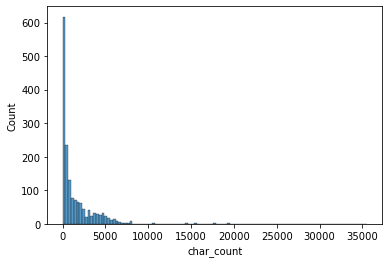

In [28]:
sns.histplot(data1[data1['target']==0]['char_count'])

<AxesSubplot:xlabel='char_count', ylabel='Count'>

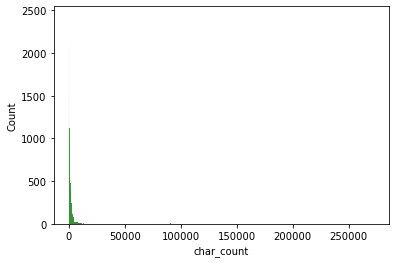

In [29]:
sns.histplot(data1[data1['target']==1]['char_count'],color='green')

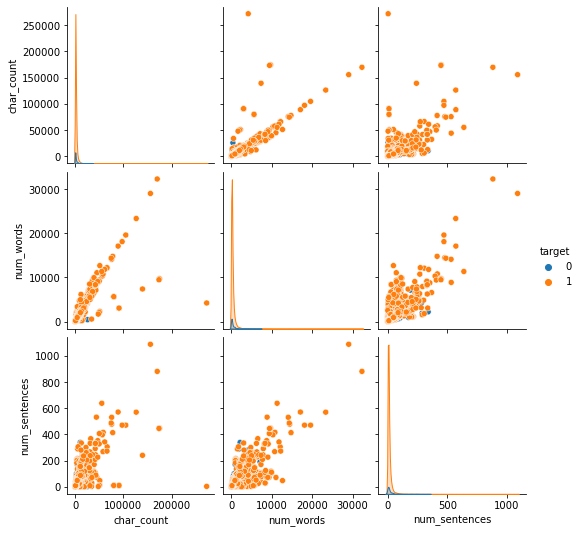

In [30]:
sns.pairplot(data1,hue='target')

<AxesSubplot:>

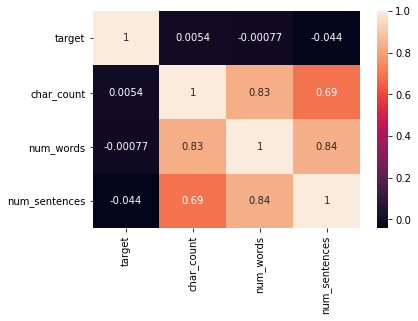

In [31]:
sns.heatmap(data1.corr(),annot=True)

# Data Preprocessing 

In [32]:
from nltk.corpus import stopwords
import string
string.punctuation
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()


def transform_text(text):
    text=text.lower()   #lower
    text=nltk.word_tokenize(text) #tokenize 
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
           
    text=y[:]  
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english')and i not in string.punctuation:   #Removing StopWords
            y.append(i)
         
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))   #Stemming
    
    return " ".join(y)

In [33]:
data1['transformed_text']=data1['text'].apply(transform_text)

In [34]:
data1.head()

,text,target,char_count,num_words,num_sentences,transformed_text
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220,44,1,eat shit john j lavorato excelr pm john ect cc...
1,fuck you,0,8,2,1,fuck
2,Gentlemen:\nThe following champagne is availab...,0,612,99,6,gentlemen follow champagn avail 70 approxim re...
3,sorry i've taken so long...just been trying to...,0,505,163,8,sorri taken long tri fend chick life sooooo ha...
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203,42,2,asshol john j lavorato excelr john ect cc subj...


In [35]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [36]:
non_abusive_wc=wc.generate(data1[data1['target']==1]['transformed_text'].str.cat(sep=""))

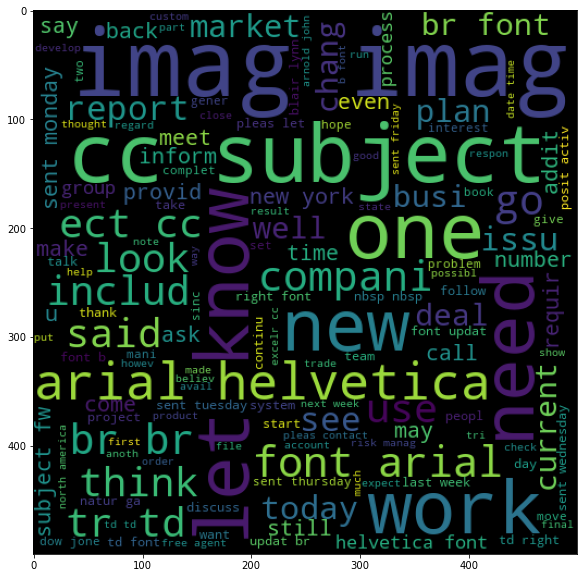

In [37]:
plt.figure(figsize=(20,10))
plt.imshow(non_abusive_wc)

In [38]:
abusive_wc=wc.generate(data1[data1['target']==0]['transformed_text'].str.cat(sep=""))

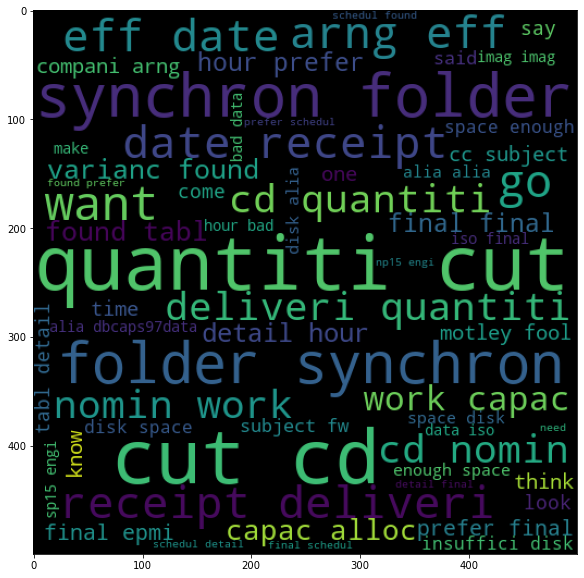

In [39]:
plt.figure(figsize=(20,10))
plt.imshow(non_abusive_wc)

In [40]:
abusive_corpus=[]
for msg in data1[data1['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        abusive_corpus.append(word)

In [41]:
len(abusive_corpus)

208413

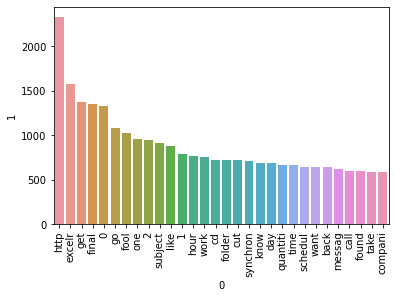

In [42]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(abusive_corpus).most_common(30))[0],pd.DataFrame(Counter(abusive_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [43]:
non_abusive_corpus=[]
for msg in data1[data1['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        non_abusive_corpus.append(word)

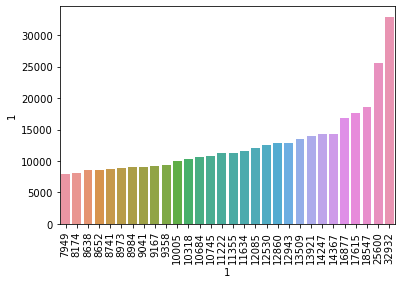

In [44]:
sns.barplot(pd.DataFrame(Counter(non_abusive_corpus).most_common(30))[1],pd.DataFrame(Counter(non_abusive_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

#  Model Building
# Doing for Imbalance Dataset 

In [63]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
vectorizer=TfidfVectorizer(max_features=10000)

In [64]:
X=vectorizer.fit_transform(data1['transformed_text'])

In [65]:
X.shape

(24656, 10000)

In [66]:
y=data1['target'].values
y

array([0, 0, 0, ..., 1, 1, 1])

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

#  Doing for Balancing by using SMOTE [Synthetic Minority Oversampling Technique]

In [69]:
from imblearn.over_sampling import SMOTE

In [70]:
smt=SMOTE()
X_train1,y_train1=smt.fit_resample(X_train,y_train)
X_test1,y_test1=smt.fit_resample(X_test,y_test)

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [72]:
svc=SVC(kernel='sigmoid',gamma=2.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)

In [73]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc
}

In [74]:
def train_classifier(clf,X_train1,y_train1,X_test1,y_test1):
    clf.fit(X_train1,y_train1)
    y_pred=clf.predict(X_test1)
    accuracy=accuracy_score(y_test1,y_pred)
    precision=precision_score(y_test1,y_pred)
    recall=recall_score(y_test1,y_pred)
    f1=f1_score(y_test1,y_pred)
    
    return accuracy,precision,recall,f1

In [75]:
accuracy_scores=[]
precision_scores=[]
recall_scores=[]
f1_scores=[]

for name,clf in clfs.items():
    
    current_accuracy,current_precision,current_recall,current_f1=train_classifier(clf,X_train1,y_train1,X_test1,y_test1)
    
    print("For -",name)
    print("Accuracy -",current_accuracy)
    print("precision -",current_precision)
    print("recall -",current_recall)
    print("f1 -",current_f1)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f1_scores.append(current_f1)

For - SVC
Accuracy - 0.9011299435028248
precision - 0.8942759504485263
recall - 0.9098218166014777
f1 - 0.9019819043515725
For - KN
Accuracy - 0.6828552803129074
precision - 0.9714285714285714
recall - 0.3767926988265971
f1 - 0.542977923907938
For - NB
Accuracy - 0.9161234245980009
precision - 0.9145021645021645
recall - 0.9180790960451978
f1 - 0.9162871394491434
For - DT
Accuracy - 0.7457627118644068
precision - 0.7769343780607247
recall - 0.6894828335506301
f1 - 0.7306009670734515
For - LR
Accuracy - 0.9621903520208605
precision - 0.9625924314919531
recall - 0.9617557583659279
f1 - 0.9621739130434783
For - RF
Accuracy - 0.903302911777488
precision - 0.8434492968171725
recall - 0.990438939591482
f1 - 0.9110533679792125


In [58]:
performance_df1=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'precision':precision_scores,'recall':recall_scores,'f1':f1_scores}).sort_values('Accuracy',ascending='False')

In [59]:
performance_df1

,Algorithm,Accuracy,precision,recall,f1
1,KN,0.675467,0.981515,0.357671,0.524287
3,DT,0.727510,0.833652,0.568449,0.675969
5,RF,0.900804,0.838502,0.992829,0.909163
0,SVC,0.904933,0.896236,0.915906,0.905965
2,NB,0.925902,0.918803,0.934376,0.926524
4,LR,0.960017,0.949469,0.971751,0.960481


In [60]:
performance_df2=pd.melt(performance_df1,id_vars='Algorithm')

In [61]:
performance_df2

,Algorithm,variable,value
0,KN,Accuracy,0.675467
1,DT,Accuracy,0.727510
2,RF,Accuracy,0.900804
3,SVC,Accuracy,0.904933
4,NB,Accuracy,0.925902
5,LR,Accuracy,0.960017
6,KN,precision,0.981515
7,DT,precision,0.833652
8,RF,precision,0.838502
9,SVC,precision,0.896236


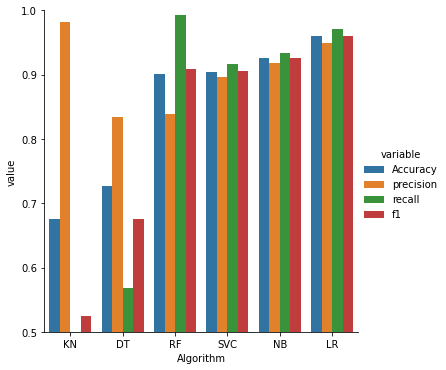

In [62]:
sns.catplot(x='Algorithm',y='value',
           hue='variable',data=performance_df2,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='horizontal')
plt.show()

In [76]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_10000':accuracy_scores,'precision_max_ft_10000':precision_scores,'recall_max_ft_10000':recall_scores,'f1_max_ft_10000':f1_scores}).sort_values('Accuracy_max_ft_10000',ascending='False')

In [78]:
performance_df1.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,precision,recall,f1,Accuracy_max_ft_10000,precision_max_ft_10000,recall_max_ft_10000,f1_max_ft_10000
0,KN,0.675467,0.981515,0.357671,0.524287,0.682855,0.971429,0.376793,0.542978
1,DT,0.727510,0.833652,0.568449,0.675969,0.745763,0.776934,0.689483,0.730601
2,RF,0.900804,0.838502,0.992829,0.909163,0.903303,0.843449,0.990439,0.911053
3,SVC,0.904933,0.896236,0.915906,0.905965,0.901130,0.894276,0.909822,0.901982
4,NB,0.925902,0.918803,0.934376,0.926524,0.916123,0.914502,0.918079,0.916287
5,LR,0.960017,0.949469,0.971751,0.960481,0.962190,0.962592,0.961756,0.962174


# logistic Regression giving the best result ,we can use it for deployment 

In [99]:
lrc=LogisticRegression(solver='liblinear',penalty='l1')
lrc.fit(X_train1,y_train1)
y_pred=lrc.predict(X_test1)
print(accuracy_score(y_test1,y_pred))
print(recall_score(y_test1,y_pred))
print(precision_score(y_test1,y_pred))
print(f1_score(y_test1,y_pred))

0.9621903520208605
0.9617557583659279
0.9625924314919531
0.9621739130434783
